## Hybrid Sim V5

In [24]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import random
import ternary

In [3]:
# Set a random seed for reproducibility (if not required comment out line)

np.random.seed(38)
random.seed(38)

In [4]:
# Define constants
chromosome_length = 15 # Total number of positions (loci) on the chromosome 
MAGENTA = 'M'
YELLOW = 'Y'

In [5]:
#Option to change recombination probability. 

use_uniform_recomb = True  # Change to False to use custom recombination prob.

if use_uniform_recomb:
    recomb_probs = [0.1] * chromosome_length  # Same recombination probability across all positions
    # 10% chance
else:
    recomb_probs = [0.01, 0.05, 0.2, 0.2, 0.05, 0.01, 0.01, 0.05, 0.2, 0.2, 0.05, 0.01, 0.01, 0.05, 0.01]


### Parent generation

In [6]:
# Create MM and YY parent populations 
num_magenta = 10
num_yellow = 10

magenta_parents = [
    [[MAGENTA] * chromosome_length, [MAGENTA] * chromosome_length]
    for _ in range(num_magenta)
]

yellow_parents = [
    [[YELLOW] * chromosome_length, [YELLOW] * chromosome_length]
    for _ in range(num_yellow)
]

### F1 generation

In [8]:
# Function to generate F1 individual pop from MM x YY
def generate_f1_population_from_parents(n, magenta_pool, yellow_pool):
    f1_population = []
    f1_parent_indices = []  # Store the (MM, YY) parent indices for each F1 individual

    for _ in range(n):
        mm_index = random.randint(0, len(magenta_pool) - 1)
        yy_index = random.randint(0, len(yellow_pool) - 1)

        mm_parent = magenta_pool[mm_index]
        yy_parent = yellow_pool[yy_index]

        strand1 = mm_parent[0]  # Take one strand from MM
        strand2 = yy_parent[1]  # Take one strand from YY

        f1_population.append([strand1.copy(), strand2.copy()])
        f1_parent_indices.append((mm_index, yy_index))  # Save parent indices

    return f1_population, f1_parent_indices

In [9]:
# Generate F1 offspring
# This function selects one random MM parent and one random YY parent for each F1 individual to simulate a cross between them.
# Each resulting offspring has one strand from MM and one from YY.
f1_offspring, f1_parent_indices = generate_f1_population_from_parents(
    n=10, magenta_pool=magenta_parents, yellow_pool=yellow_parents
)

In [ ]:
# Checkpoint 

print(f1_offspring)

In [11]:
# Pick two distinct F1 parents at random from F1 population
parent_indices = np.random.choice(len(f1_offspring), 2, replace=False) # The same individual can not be picked twice.

# Get the F1 individual corresponding to the first selected index 
parent_a = f1_offspring[parent_indices[0]]
# Get the F1 individual corresponding to the second selected index
parent_b = f1_offspring[parent_indices[1]]

In [ ]:
# Checkpoint

print(parent_a)
print(parent_b)

In [13]:
# Checkpoint

print(parent_indices)

[8 0]


In [14]:
# Get which MM and YY parents made each selected F1 parent
f1a_mm_index, f1a_yy_index = f1_parent_indices[parent_indices[0]]
f1b_mm_index, f1b_yy_index = f1_parent_indices[parent_indices[1]]

# Fetch the actual individuals
mm_parent_a = magenta_parents[f1a_mm_index]
yy_parent_a = yellow_parents[f1a_yy_index]

mm_parent_b = magenta_parents[f1b_mm_index]
yy_parent_b = yellow_parents[f1b_yy_index]

# F1 individuals already known:
f1_a = parent_a
f1_b = parent_b

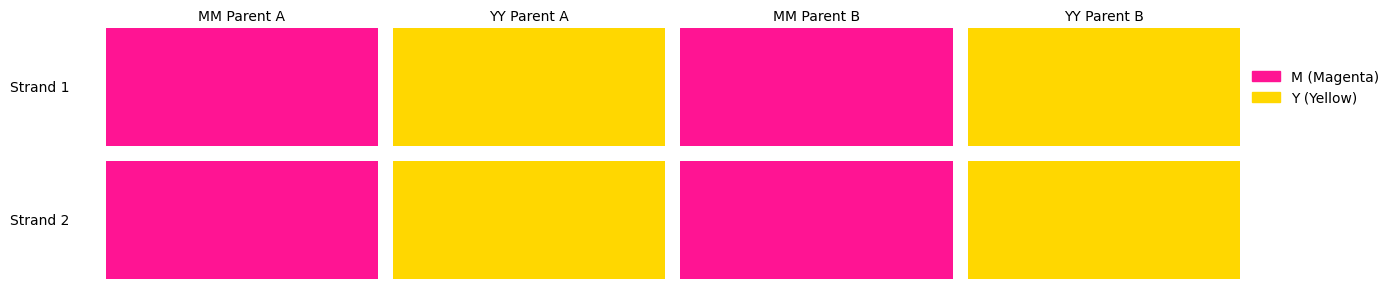

In [15]:
# Visualise parents 
# Set up colour map
color_map = {'M': 'deeppink', 'Y': 'gold'}

# Create figure: 4 parents in columns, 2 strands (rows) per individual
fig, axs = plt.subplots(2, 4, figsize=(14, 3), sharex=True)

# Titles for columns (individuals)
titles = ["MM Parent A", "YY Parent A", "MM Parent B", "YY Parent B"]

# Strand data grouped per individual
parent_strand_pairs = [
    (mm_parent_a[0], mm_parent_a[1]),
    (yy_parent_a[0], yy_parent_a[1]),
    (mm_parent_b[0], mm_parent_b[1]),
    (yy_parent_b[0], yy_parent_b[1])
]

# Plot each individual's strands
for col, (strand1, strand2) in enumerate(parent_strand_pairs):
    for row, strand in enumerate([strand1, strand2]):
        for i, allele in enumerate(strand):
            axs[row][col].add_patch(mpatches.Rectangle((i, 0), 1, 1, color=color_map[allele]))
        axs[row][col].set_xlim(0, chromosome_length)
        axs[row][col].set_ylim(0, 1)
        axs[row][col].axis('off')

    # Add title above column
    axs[0][col].set_title(titles[col], fontsize=10)

# Add strand labels to left side
axs[0][0].text(-2, 0.5, "Strand 1", va='center', ha='right', fontsize=10)
axs[1][0].text(-2, 0.5, "Strand 2", va='center', ha='right', fontsize=10)

# Add legend
legend_patches = [
    mpatches.Patch(color='deeppink', label='M (Magenta)'),
    mpatches.Patch(color='gold', label='Y (Yellow)')
]
axs[0][3].legend(handles=legend_patches, loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)

plt.tight_layout()
plt.show()

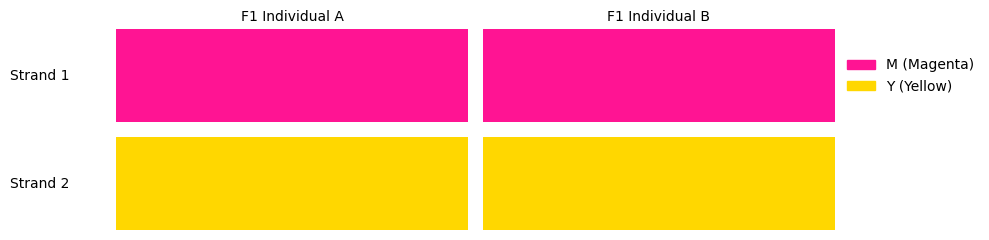

In [16]:
# Visualise F1 individuals 
fig, axs = plt.subplots(2, 2, figsize=(10, 2.5), sharex=True)

# Titles for each F1 individual
titles = ["F1 Individual A", "F1 Individual B"]

# F1 strand data grouped
f1_strand_pairs = [
    (f1_a[0], f1_a[1]),
    (f1_b[0], f1_b[1])
]

# Plot each F1 individual
for col, (strand1, strand2) in enumerate(f1_strand_pairs):
    for row, strand in enumerate([strand1, strand2]):
        for i, allele in enumerate(strand):
            axs[row][col].add_patch(mpatches.Rectangle((i, 0), 1, 1, color=color_map[allele]))
        axs[row][col].set_xlim(0, chromosome_length)
        axs[row][col].set_ylim(0, 1)
        axs[row][col].axis('off')
    axs[0][col].set_title(titles[col], fontsize=10)

# Add strand labels to left side
axs[0][0].text(-2, 0.5, "Strand 1", va='center', ha='right', fontsize=10)
axs[1][0].text(-2, 0.5, "Strand 2", va='center', ha='right', fontsize=10)

# Add legend
axs[0][1].legend(handles=legend_patches, loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)

plt.tight_layout()
plt.show()

### Hybrid Index Calculation Parents and F1

In [26]:
# 'M' = magenta, 'Y' = yellow
# MM = 2, MY/YM = 1, YY = 0

# Function to convert two strands into numeric genotypes
def get_numeric_genotype(strand1, strand2):
    numeric = []
    for a, b in zip(strand1, strand2):
        pair = sorted([a, b])  # account for 'MY' and 'YM' 
        if pair == ['M', 'M']:
            numeric.append(2)
        elif pair == ['Y', 'Y']:
            numeric.append(0)
        else:
            numeric.append(1)
    return numeric

# Function to calculate HI and HET from numeric genotype
def calculate_hi_het(genotype_numeric):
    num_loci = len(genotype_numeric)
    total_alleles = 2 * num_loci
    num_mm = genotype_numeric.count(2)
    num_yy = genotype_numeric.count(0)
    num_het = genotype_numeric.count(1)
    num_m_alleles = (2 * num_mm) + (1 * num_het)
    hi = num_m_alleles / total_alleles
    het = num_het / num_loci
    return hi, het

# Get numerci genotype for each individual 

# MM and YY parents of F1_A
genotype_mm_a = get_numeric_genotype(mm_parent_a[0], mm_parent_a[1])
genotype_yy_a = get_numeric_genotype(yy_parent_a[0], yy_parent_a[1])

# MM and YY parents of F1_B
genotype_mm_b = get_numeric_genotype(mm_parent_b[0], mm_parent_b[1])
genotype_yy_b = get_numeric_genotype(yy_parent_b[0], yy_parent_b[1])

# F1 Individuals
genotype_f1_a = get_numeric_genotype(f1_a[0], f1_a[1])
genotype_f1_b = get_numeric_genotype(f1_b[0], f1_b[1])

# Calculate HI and HET (Hybrid Index and Heterozygosity)

hi_mm_a, het_mm_a = calculate_hi_het(genotype_mm_a)
hi_yy_a, het_yy_a = calculate_hi_het(genotype_yy_a)

hi_mm_b, het_mm_b = calculate_hi_het(genotype_mm_b)
hi_yy_b, het_yy_b = calculate_hi_het(genotype_yy_b)

hi_f1_a, het_f1_a = calculate_hi_het(genotype_f1_a)
hi_f1_b, het_f1_b = calculate_hi_het(genotype_f1_b)

In [ ]:
# Output results 

print(f"F1_A's MM Parent -> HI: {hi_mm_a:.2f}, HET: {het_mm_a:.2f}")
print(f"F1_A's YY Parent -> HI: {hi_yy_a:.2f}, HET: {het_yy_a:.2f}")
print(f"F1_A Individual  -> HI: {hi_f1_a:.2f}, HET: {het_f1_a:.2f}")
print()
print(f"F1_B's MM Parent -> HI: {hi_mm_b:.2f}, HET: {het_mm_b:.2f}")
print(f"F1_B's YY Parent -> HI: {hi_yy_b:.2f}, HET: {het_yy_b:.2f}")
print(f"F1_B Individual  -> HI: {hi_f1_b:.2f}, HET: {het_f1_b:.2f}")


### F2 generation

In [17]:
# Simulate F2 offspring
# Create an empty list for new F2 strands
strand_1 = []
strand_2 = []

# Randomly choose which F1 parent to start with for creating the F2
strand_1_source = np.random.choice([0, 1])  # 0 = parent A, 1 = parent B
strand_2_source = np.random.choice([0, 1])

# Loop through each position (locus) in the chromosome 
for i in range(chromosome_length):

    #For strand 1, randomly select if recombination happens at this position based on the recomb_prob.
    #If yes, switch the source parent for this strand. 
    if i > 0 and np.random.rand() < recomb_probs[i]:
        strand_1_source = 1 - strand_1_source # Work between parent 0 and 1 

    # For strand 2, do the same as above and change where required. 
    if i > 0 and np.random.rand() < recomb_probs[i]:
        strand_2_source = 1 - strand_2_source

    # Append allele from designated parent and position. 
    # Dependent on the source parent. 
    strand_1.append(parent_a[strand_1_source][i] if strand_1_source == 0 else parent_b[strand_1_source][i])
    strand_2.append(parent_a[strand_2_source][i] if strand_2_source == 0 else parent_b[strand_2_source][i])

In [18]:
# Checkpoint: print strand data

print("F2 offspring strands generated:")
print("Strand 1:", strand_1)
print("Strand 2:", strand_2)

F2 offspring strands generated:
Strand 1: ['M', 'M', 'M', 'M', 'M', 'M', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y']
Strand 2: ['M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'Y', 'M', 'Y', 'Y', 'Y', 'Y', 'Y']


In [19]:
# Compute genotype numeric representation
# Create lists to store numeric and label data
f2_chromosome = []          # Numerical representation (2, 1, 0)
f2_genotype_labels = []     # Actual strand combinations ('MM', 'MY', 'YM', 'YY')

# Loop through alleles at each position from both strands at the same time.
for a, b in zip(strand_1, strand_2):

    # Combine into pairs and assign numeric genotype
    pair = sorted([a, b])
    
    if pair == ['M', 'M']:
        f2_chromosome.append(2)
        f2_genotype_labels.append('MM')
    elif pair == ['Y', 'Y']:
        f2_chromosome.append(0)
        f2_genotype_labels.append('YY')
    else:
        f2_chromosome.append(1)
        f2_genotype_labels.append(a + b)  #Actual orientation: 'MY' or 'YM'

In [20]:
# Checkpoint: print genotype array

print("F2 genotype numeric values:", f2_chromosome)
print("F2 genotype strand labels :", f2_genotype_labels)

F2 genotype numeric values: [2, 2, 2, 2, 2, 2, 1, 1, 0, 1, 0, 0, 0, 0, 0]
F2 genotype strand labels : ['MM', 'MM', 'MM', 'MM', 'MM', 'MM', 'YM', 'YM', 'YY', 'YM', 'YY', 'YY', 'YY', 'YY', 'YY']


In [ ]:
# Visualise F2 chromosome
# Define colour for M and Y
color_map = {'M': 'deeppink', 'Y': 'gold'}
# Create a figure with 4 vertically stacked subplots 
fig, axs = plt.subplots(4, 1, figsize=(12, 4), sharex=True)

# Set titles for each subplot row
axs[0].set_title("Allele Strand 1")
axs[1].set_title("Allele Strand 2")
axs[2].set_title("Genotype Numeric (2=MM, 1=MY/YM, 0=YY)")
axs[3].set_title("Genotype Labels (e.g., MY, YM)")

# Plot all allele colours, geotype values  and labels 
for i, allele in enumerate(strand_1):
    axs[0].add_patch(mpatches.Rectangle((i, 0), 1, 1, color=color_map[allele]))
for i, allele in enumerate(strand_2):
    axs[1].add_patch(mpatches.Rectangle((i, 0), 1, 1, color=color_map[allele]))
for i, val in enumerate(f2_chromosome):
    axs[2].text(i + 0.4, 0.5, str(val), fontsize=12)
    axs[2].add_patch(mpatches.Rectangle((i, 0), 1, 1, edgecolor='black', facecolor='white', fill=False))
for i, label in enumerate(f2_genotype_labels):
    axs[3].text(i + 0.3, 0.5, label, fontsize=10)
    axs[3].add_patch(mpatches.Rectangle((i, 0), 1, 1, edgecolor='grey', facecolor='white', fill=False))

# Format each subplot
for ax in axs:
    ax.set_xlim(0, chromosome_length)
    ax.set_ylim(0, 1)
    ax.axis('off')

# Add legend
legend_patches = [
    mpatches.Patch(color='deeppink', label='M (Magenta)'),
    mpatches.Patch(color='gold', label='Y (Yellow)')
]
axs[0].legend(handles=legend_patches, loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)

# Adjust spacing and display 
plt.tight_layout()
plt.show()

In [ ]:
# Checkpoint - for verification purposes 

print("Strand 1:", strand_1)
print("Strand 2:", strand_2)
print("F2 Chromosome Genotype:", f2_chromosome)

### Hybrid Index Calculation F2

In [29]:
# Genotype representatives 
# 2 = MM
# 1 = MY or YM
# 0 = YY

hi_f2 = hybrid_index
het_f2 = heterozygosity

# F2 individual’s genotype
genotype_numeric = f2_chromosome  

# Count the total number of loci (positions along the chromosome)
num_loci = len(genotype_numeric)

# Each locus has 2 alleles, so total alleles = 2 * number of loci
total_alleles = 2 * num_loci

# Count MM loci (value = 2)
num_mm = genotype_numeric.count(2)

# Count heterzygous loci (MY or YM) (value = 1)
num_het = genotype_numeric.count(1)

# Count YY loci (value = 0)
num_yy = genotype_numeric.count(0)

# Calculate the total number of M alleles for hybrid index claculation 
# Each MM contributes 2 M alleles
# Each MY/YM contributes 1 M allele
# YY contributes 0 M alleles
num_m_alleles = (2 * num_mm) + (1 * num_het)

# Hybrid Index Calculation 
# Proportion of M alleles out of all alleles
hybrid_index = num_m_alleles / total_alleles

# Calculate heterozygosity:
# This is the proportion of heterozygous loci
heterozygosity = num_het / num_loci


Hybrid Index: 0.50
Heterozygosity: 0.20


In [ ]:
# Print results
print(hi_f2) # Value from 0 (YY) to 1 (MM)
print(het_f2) # Value from 0 (none heterozygous) to 1 (all heterozygous) along loci

In [ ]:
# Example output: 

#Hybrid Index: 0.50
#Heterozygosity: 0.20

#Hybrid index is not skewed to either M or Y here. 

### Triangle Plot

In [35]:
# Lists for plotting to contain HI, Het for each specific individual plotting points. 
points = [
    (hi_mm_a, het_mm_a), # F1_A MM parent
    (hi_yy_a, het_yy_a), # F1_A YY parent
    (hi_f1_a, het_f1_a), # F1_A individual 
    
    (hi_mm_b, het_mm_b), # F1_B MM parent 
    (hi_yy_b, het_yy_b), # F1_B YY parent 
    (hi_f1_b, het_f1_b), # F1_B individual 
    
    (hi_f2, het_f2), # F2 individual 
]

# Create a list for each point above to be labelled 
# Labels for annotation on graph 

labels = [
    "MM_A", "YY_A", "F1_A",
    "MM_B", "YY_B", "F1_B",
    "F2"  
]

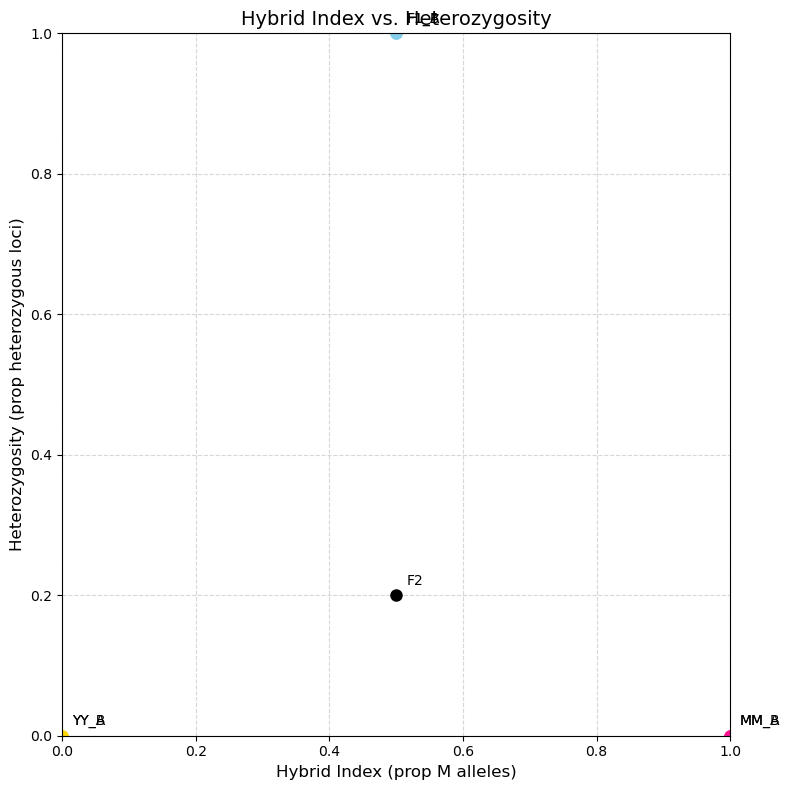

In [39]:
# Indicate plotting scale
# Hybrid index (HI) goes from 0 to 1 on the x-axis (from YY to MM)
# Heterozygosity (HET) goes from 0 to 1 on the y-axis (max at 50:50 inheritance)

# Define colours points
label_colors = {
    "YY_A": "gold",      # Yellow parent
    "MM_A": "deeppink",  # Magenta parent
    "YY_B": "gold",
    "MM_B": "deeppink",
    # Other points like F1s and F2 can have a neutral color
    "F1_A": "skyblue",
    "F1_B": "skyblue",
    "F2": "black"
}

# Create the plot
fig, ax = plt.subplots(figsize=(8, 8))

# Label axes
ax.set_xlabel("Hybrid Index (prop M alleles)", fontsize=12)
ax.set_ylabel("Heterozygosity (prop heterozygous loci)", fontsize=12)

# Plot points
for (x, y), label in zip(points, labels):
    color = label_colors.get(label, "blue")  # Default to blue if not specified
    ax.plot(x, y, 'o', markersize=8, color=color)
    ax.text(x + 0.015, y + 0.015, label, fontsize=10)

# Set axis limits and grid
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.grid(True, linestyle='--', alpha=0.5)
ax.set_title("Hybrid Index vs. Heterozygosity", fontsize=14)

plt.tight_layout()
plt.show()
